In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('./data/iris.data', header=None, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = df.to_numpy()[:,(2,3)].astype(float)
X: np.ndarray = StandardScaler().fit_transform(np.copy(data))
X.mean(axis=0), X.std(axis=0)

(array([ 3.31586610e-16, -2.84217094e-16]), array([1., 1.]))

In [4]:
X[:5]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673]])

In [5]:
def random_mu(X: np.ndarray, k: int) -> np.ndarray:
    # if this random selection chooses i. e. X[0] and X[1] we'll get a devide by 0 error because X[0]-X[1] = (0,0)
    # so we make sure the vectors in mu are pairwise different
    
    indizes = np.arange(len(X))
    np.random.shuffle(indizes)
    mu = X[indizes[:k]]
    
    while not is_mu_valid(mu):
        indizes = np.arange(len(X))
        np.random.shuffle(indizes)
        mu = X[indizes[:k]]
    
    return mu

In [6]:
def is_mu_valid(mu: np.ndarray) -> bool:
    k = len(mu)
    for i in range(k - 1):
        for j in range(i + 1, k):
            if mu[i][0] == mu[j][0] and mu[i][1] == mu[j][1]:
                return False
    return True
    

In [7]:
def assign_to_cluster(x: np.ndarray, mu: np.ndarray) -> np.ndarray:
    z = np.zeros((len(mu), 1))
    cluster_distances = np.zeros_like(mu)
    
    for i in range(len(mu)):
        cluster_distances[i] = np.linalg.norm(x - mu[i]) ** 2
        
    index = np.argmin(cluster_distances, axis=0)
    z[index] = 1
    
    return z.squeeze()

In [8]:
def all_cluster(X: np.ndarray, mu: np.ndarray) -> np.ndarray:
    all_z = []
    for x in X:
        all_z.append(assign_to_cluster(x, mu))
    return np.array(all_z)

In [9]:
def compute_mu(X: np.ndarray, Z: np.ndarray, mu: np.ndarray) -> np.ndarray:
    mu: np.ndarray = np.zeros_like(mu)
    for i in range(len(mu)):
        for n in range(len(Z)):
            mu[i] += (Z[n][i] * X[n])
        mu[i] /= np.sum(Z[:,i])
    return mu

In [10]:
def plot_k_means(X: np.ndarray, k: int):
    mu: np.ndarray = random_mu(X, k)
    Z: np.ndarray = all_cluster(X, mu)
    change = 1
    
    while change > 0:
        plot_groups(X, Z, mu)
        Z = all_cluster(X, mu)
        updated_mu = compute_mu(X, Z, mu)
        change = np.linalg.norm(mu - updated_mu)
        mu = updated_mu

In [11]:
def k_means(X: np.ndarray, k: int) -> np.ndarray:
    mu = random_mu(X, k)
    Z = all_cluster(X, mu)
    change = 1
    
    while change > 0:
        Z = all_cluster(X, mu)
        updated_mu = compute_mu(X, Z, mu)
        change = np.linalg.norm(mu - updated_mu)
        mu = updated_mu
    
    return mu

In [12]:
def plot_groups(X: np.ndarray, Z: np.ndarray, mu: np.ndarray):
    color_vector = np.array([0, 1, 2])
    color = np.sum(Z * color_vector, axis=1)
    
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111) 
    ax.set_xlabel('petal length normed')
    ax.set_ylabel('petal width normed')
    ax.scatter(X[:,0], X[:,1], c=color, cmap='winter');
    ax.scatter(mu[:,0], mu[:,1], s=100, marker='X', c='r');

In [13]:
cluster_centroids = k_means(X, 3)
cluster_centroids

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

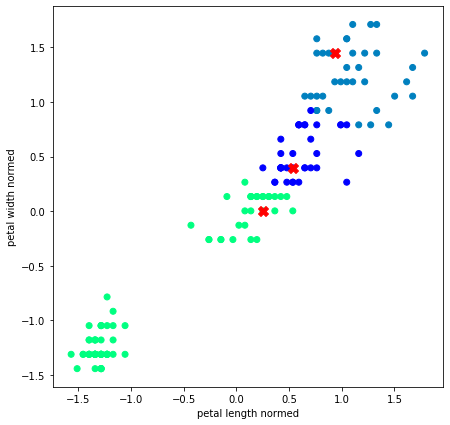

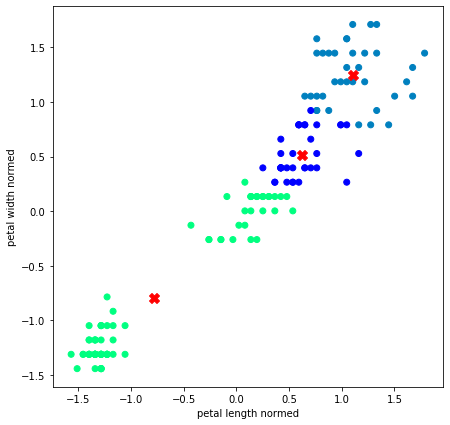

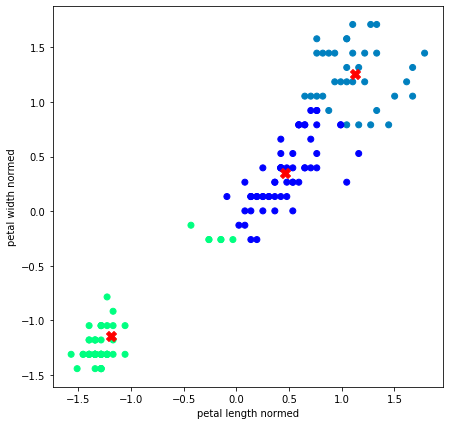

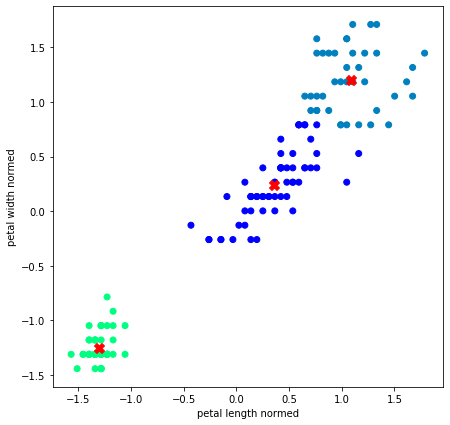

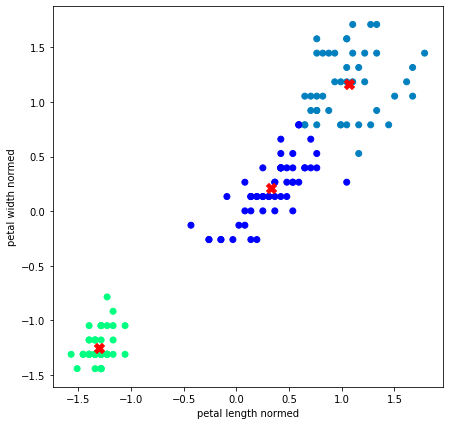

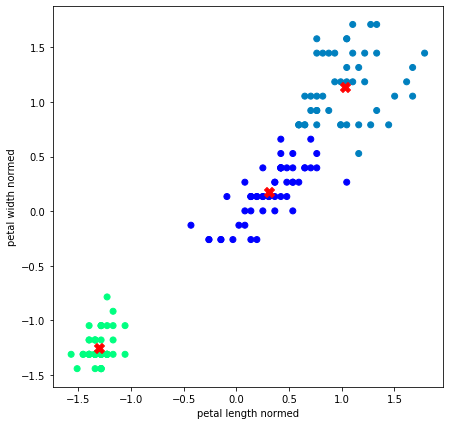

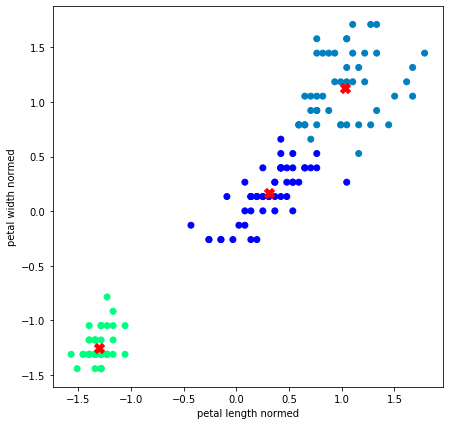

In [14]:
plot_k_means(X, 3)

In [15]:
cluster = all_cluster(X, cluster_centroids)
cv = np.array([0, 1, 2])
color = np.sum(cluster * cv, axis=1)

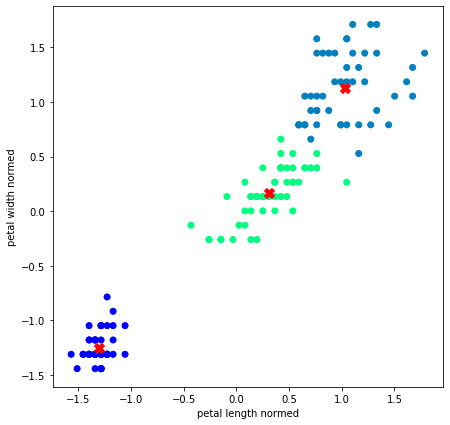

In [16]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111) 
ax.set_xlabel('petal length normed')
ax.set_ylabel('petal width normed')
ax.scatter(X[:,0], X[:,1], c=color, cmap='winter');
ax.scatter(cluster_centroids[:,0], cluster_centroids[:,1], s=100, marker='X', c='r');

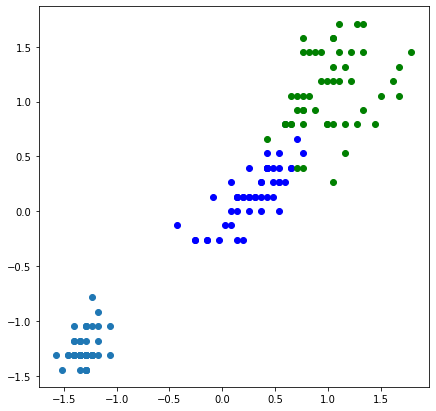

In [17]:
# compare to actual groups
plt.figure(figsize=(7,7))
plt.plot(X[:50,0],X[:50,1], 'o');
plt.plot(X[50:100,0],X[50:100,1], 'o', c='b');
plt.plot(X[100:150,0],X[100:150,1], 'o', c= 'g');